=== Starting Analysis Pipeline ===
Attempting to load data from: S:\AI MAstery\week-10\bayesian-change-point-analysis\data\processed\brent_clean.csv
Data loaded: (9011, 3) from 1987-05-20 00:00:00 to 2022-11-14 00:00:00

Missing values summary:
 Price            0
daily_return     1
volatility      30
dtype: int64

Generating all EDA and change detection plots...


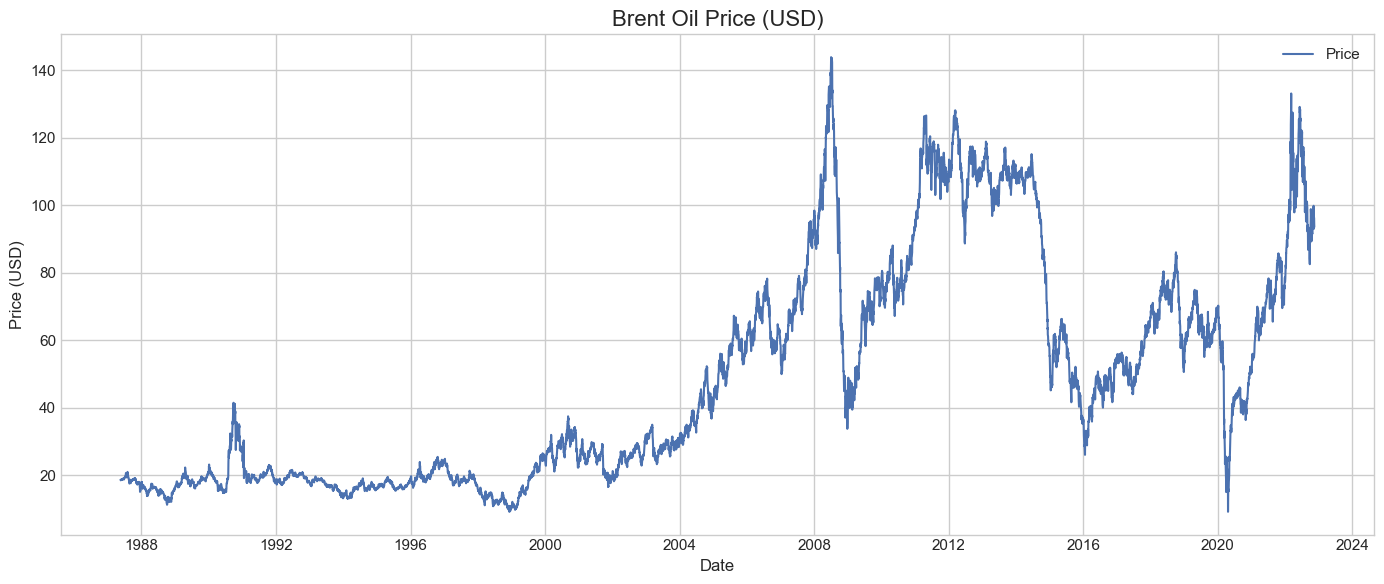

Saved plot: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\price_plot.png


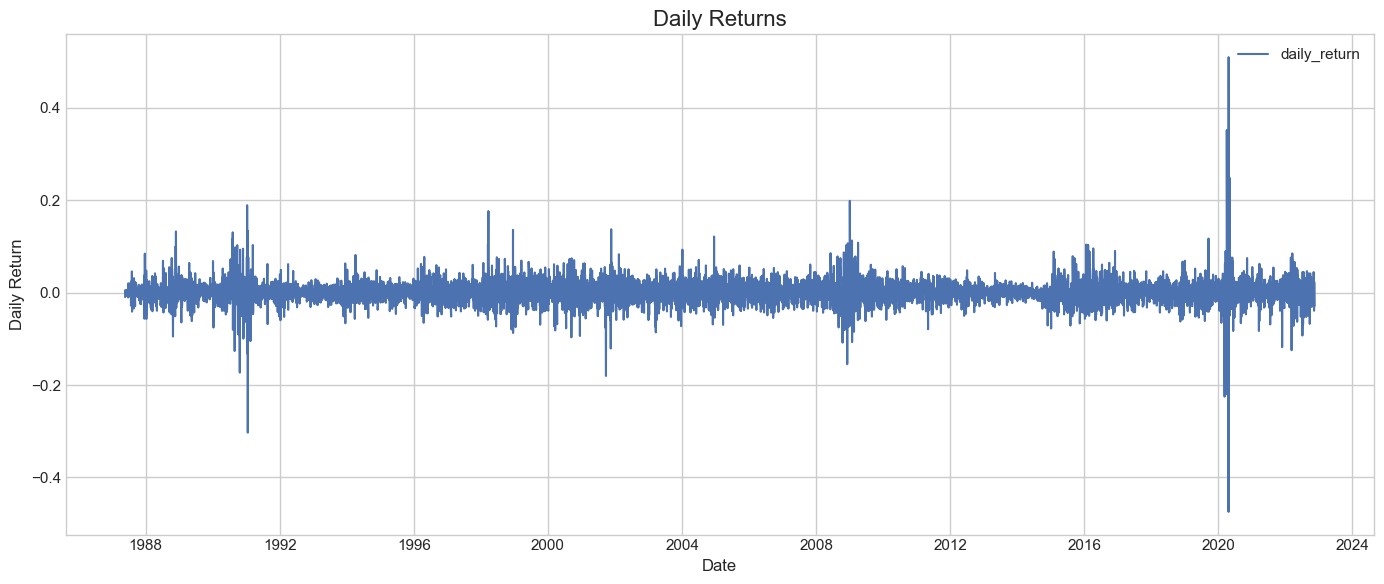

Saved plot: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\daily_return_plot.png


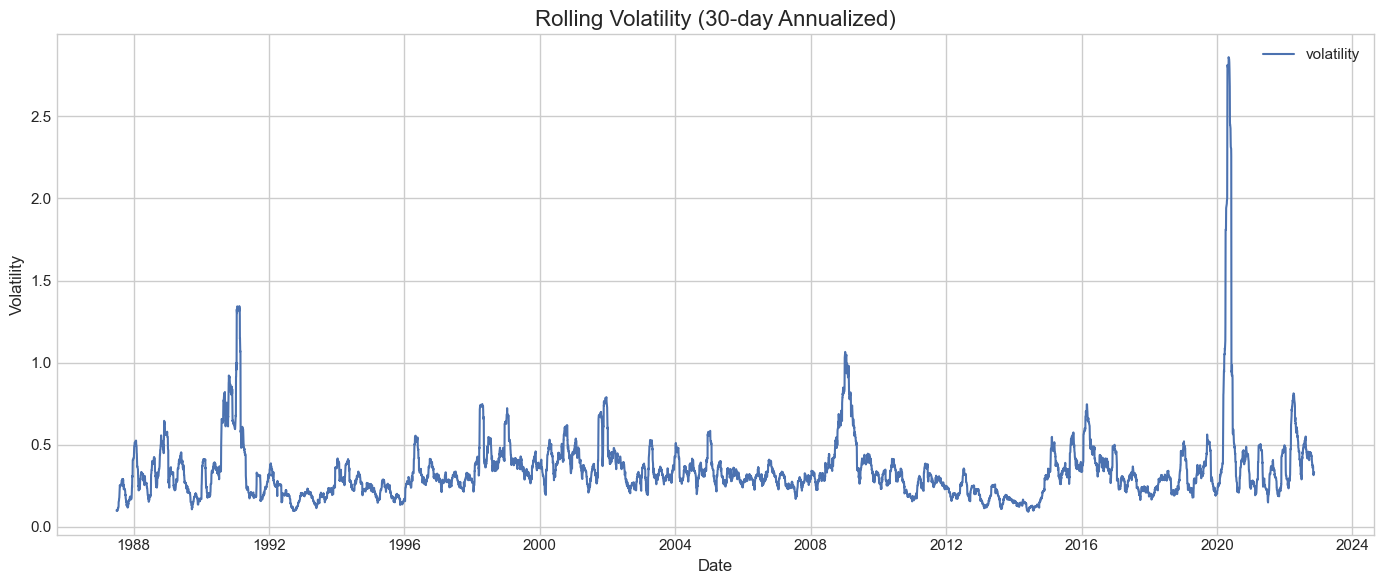

Saved plot: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\volatility_plot.png


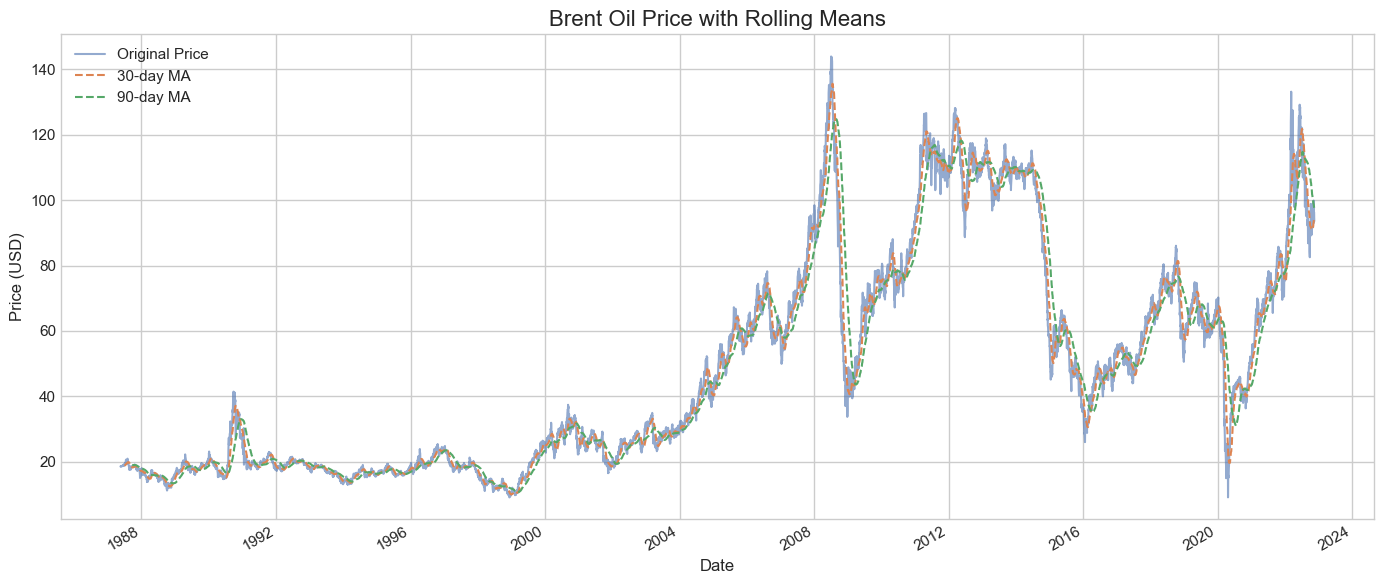

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\rolling_means.png


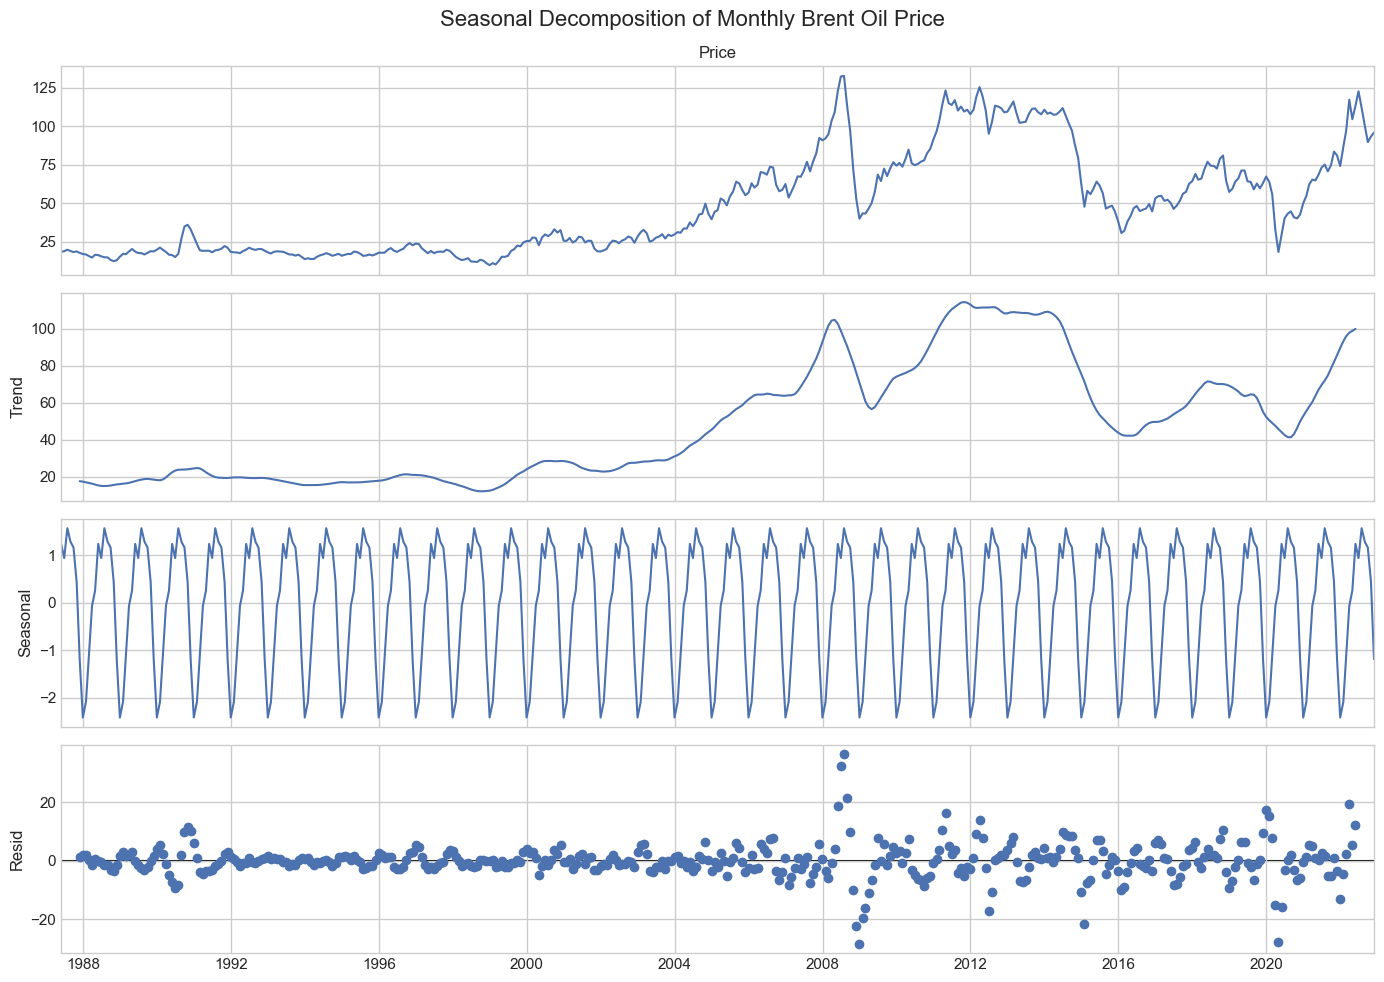

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\seasonal_decomposition.png


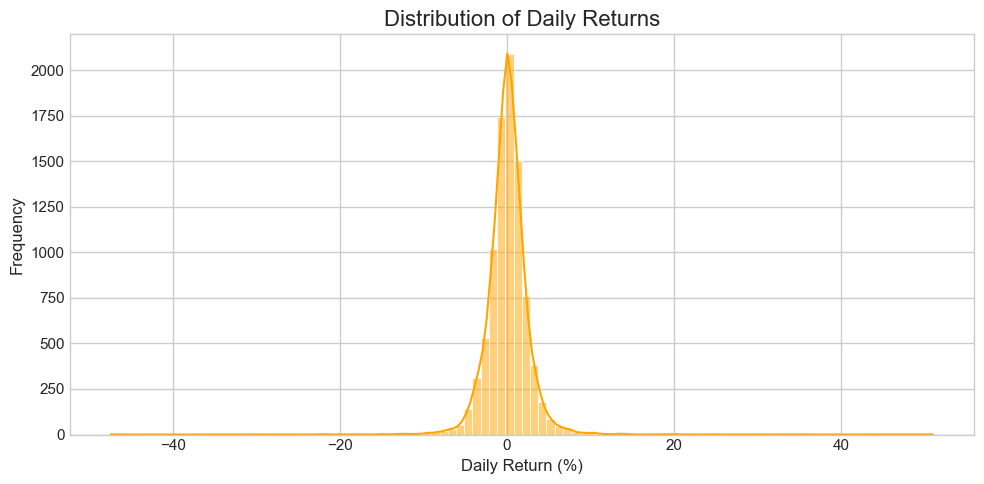

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\daily_return_distribution.png


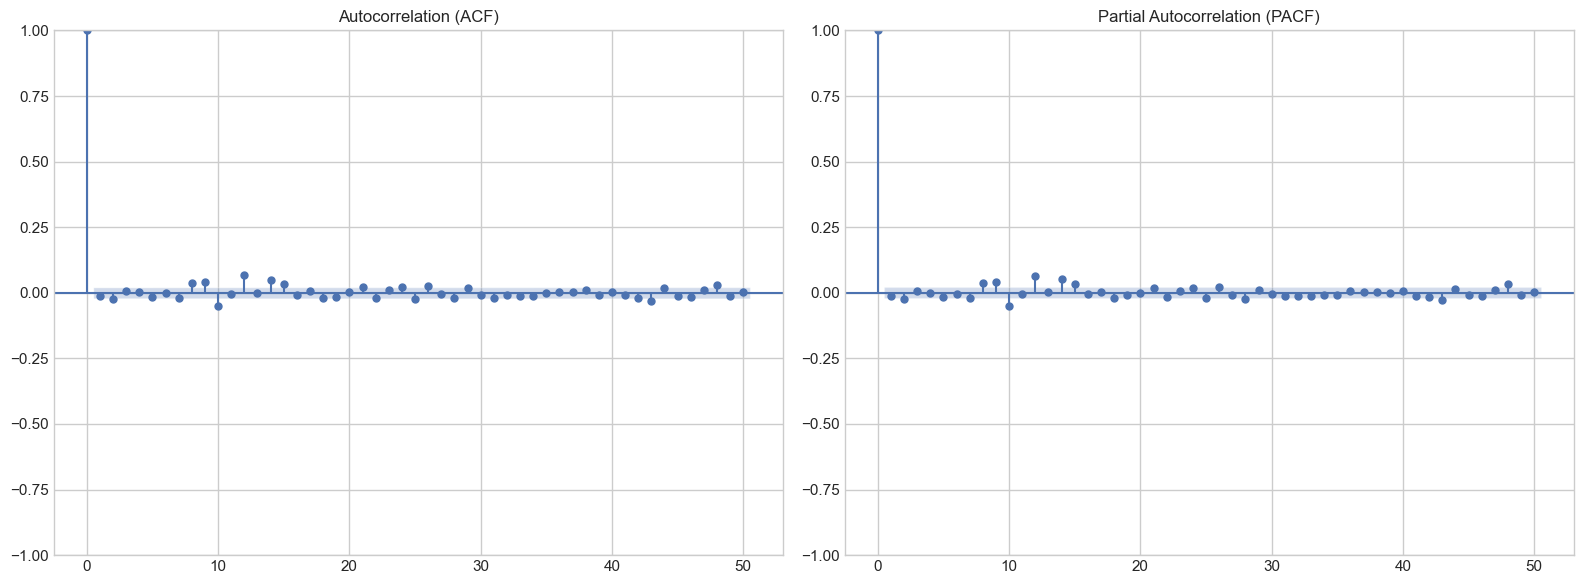

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\acf_pacf.png
Compiling key event metadata...
Compiled 10 events.
Generating plot with events: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\price_with_events.png


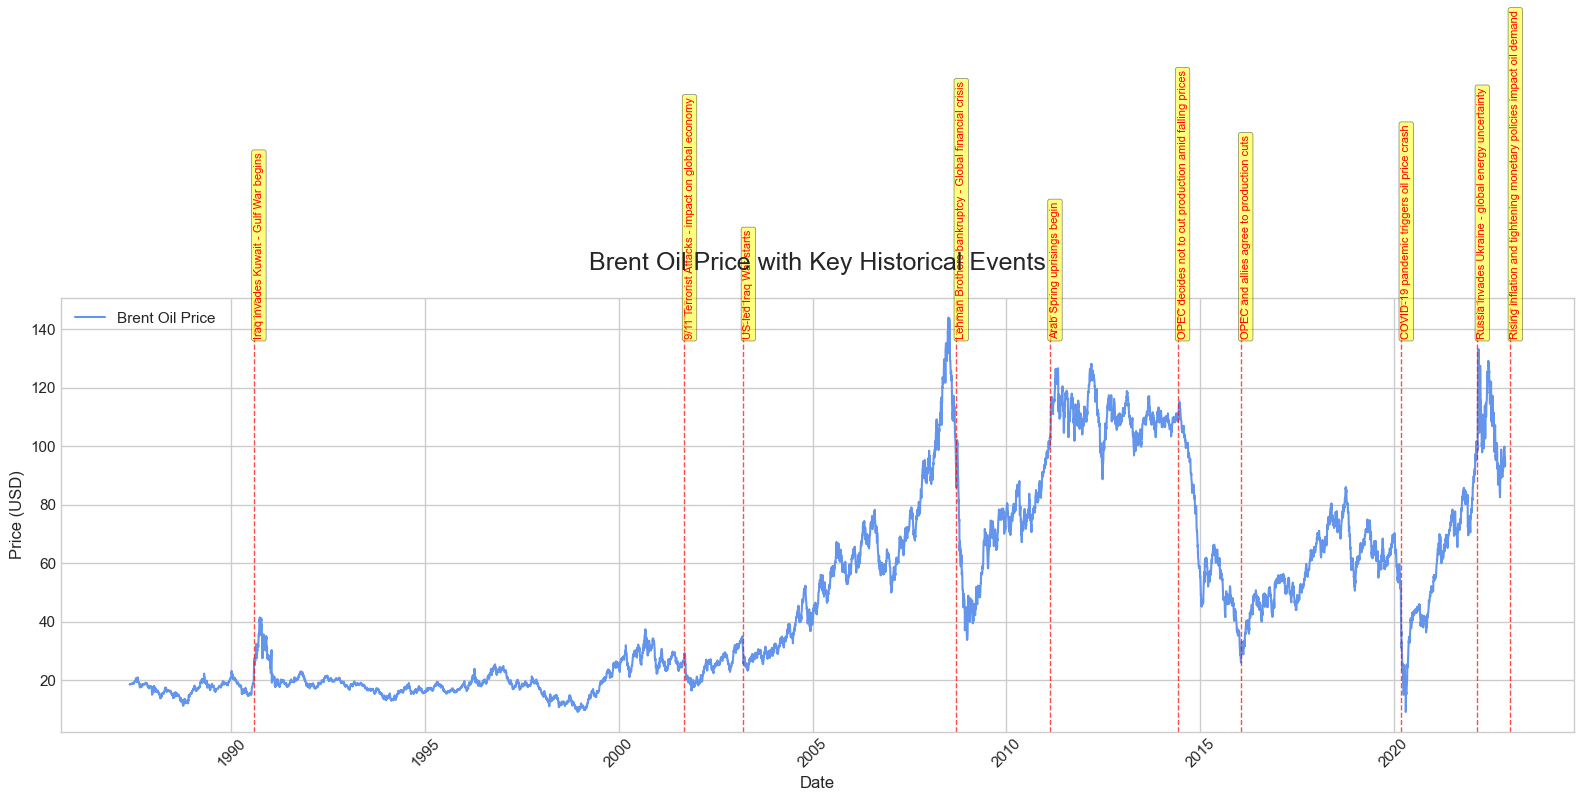

Plot saved successfully to: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\price_with_events.png

--- Running Stationarity Tests ---
Augmented Dickey-Fuller (ADF) Test:
ADF Statistic: -1.9939, p-value: 0.2893

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
KPSS Statistic: 9.5588, p-value: 0.0100

=== Analysis Complete ===
All plots are saved in the 'S:\AI MAstery\week-10\bayesian-change-point-analysis\reports/figures' directory.


In [6]:
import sys
import os

# Define the project's root path by looking for key directories.
# This makes the code more robust to where the notebook is run from.
current_dir = os.getcwd()
while 'src' not in os.listdir(current_dir) and 'notebooks' not in os.listdir(current_dir):
    parent_dir = os.path.dirname(current_dir)
    if parent_dir == current_dir:
        raise FileNotFoundError("Could not find project root directory with 'src' and 'notebooks' folders.")
    current_dir = parent_dir
project_root_path = current_dir

# Now, define the path to the 'src' directory correctly
src_path = os.path.join(project_root_path, 'src')

# Add the 'src' directory to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added {src_path} to Python path.")

# Check if the file exists in the directory we just added
if 'eda_and_change_detection_utils.py' not in os.listdir(src_path):
    raise FileNotFoundError("The file 'eda_and_change_detection_utils.py' was not found in the 'src' directory.")

# Now, import the module by its filename
import eda_and_change_detection_utils

# This single line will run the entire pipeline
eda_and_change_detection_utils.main()

=== Starting Analysis Pipeline ===
Attempting to load data from: S:\AI MAstery\week-10\bayesian-change-point-analysis\data\processed\brent_clean.csv
Data loaded: (9011, 3) from 1987-05-20 00:00:00 to 2022-11-14 00:00:00

Missing values summary:
 Price            0
daily_return     1
volatility      30
dtype: int64

Generating all EDA and change detection plots...


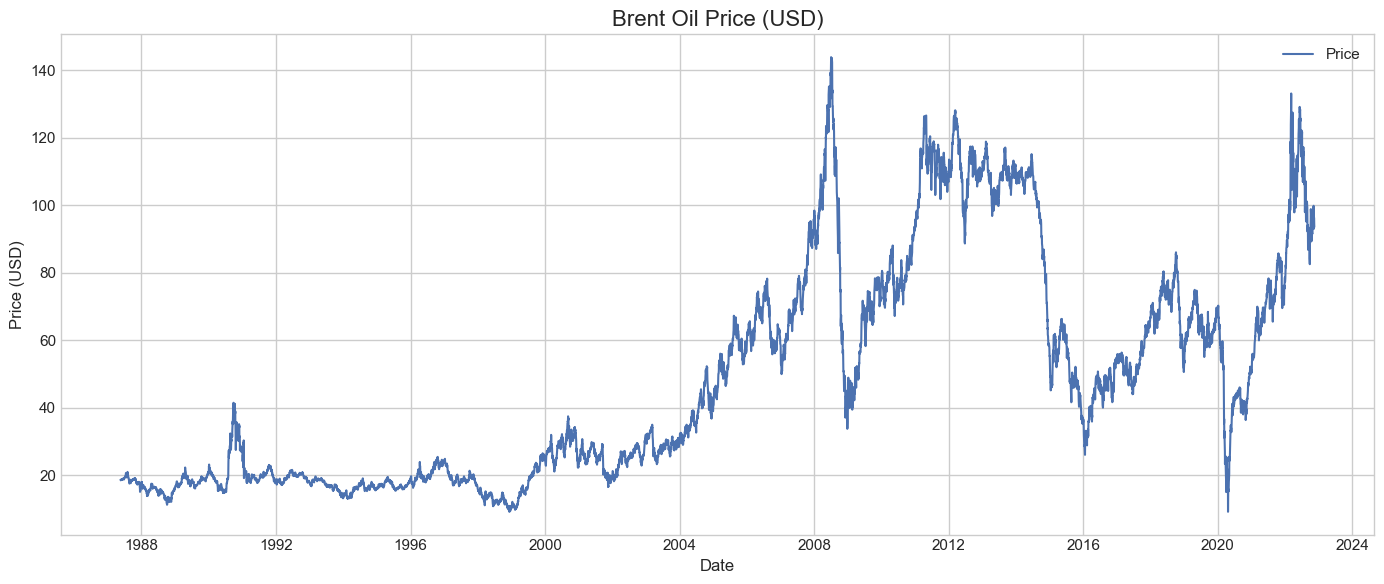

Saved plot: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\price_plot.png


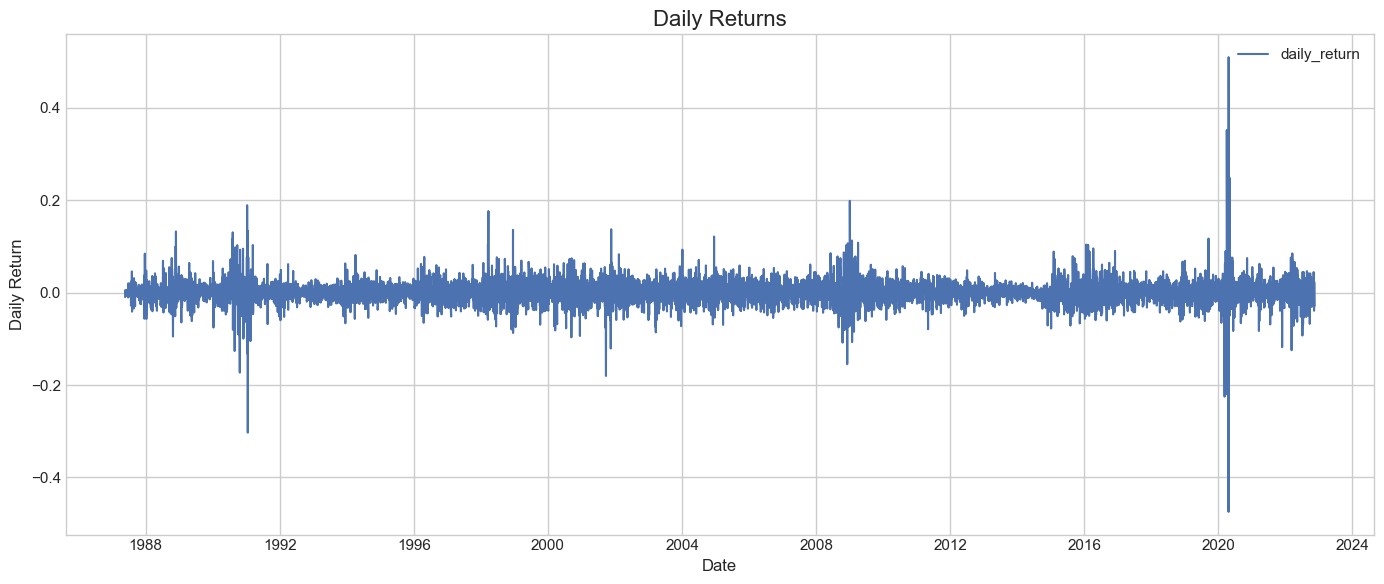

Saved plot: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\daily_return_plot.png


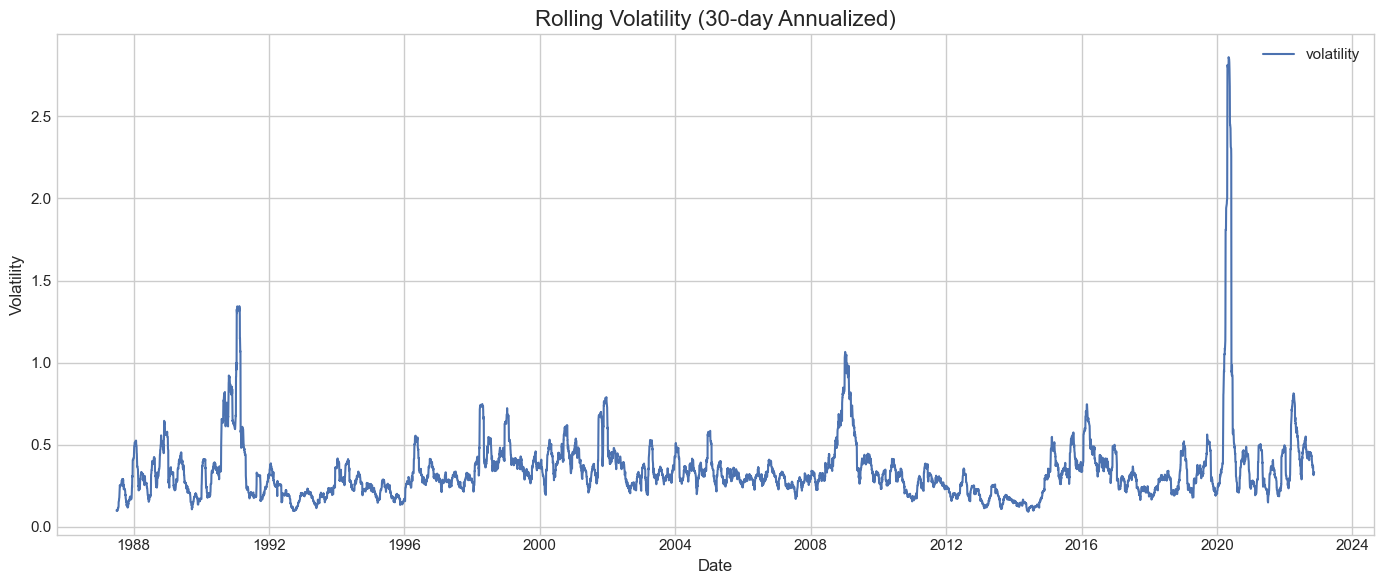

Saved plot: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\volatility_plot.png


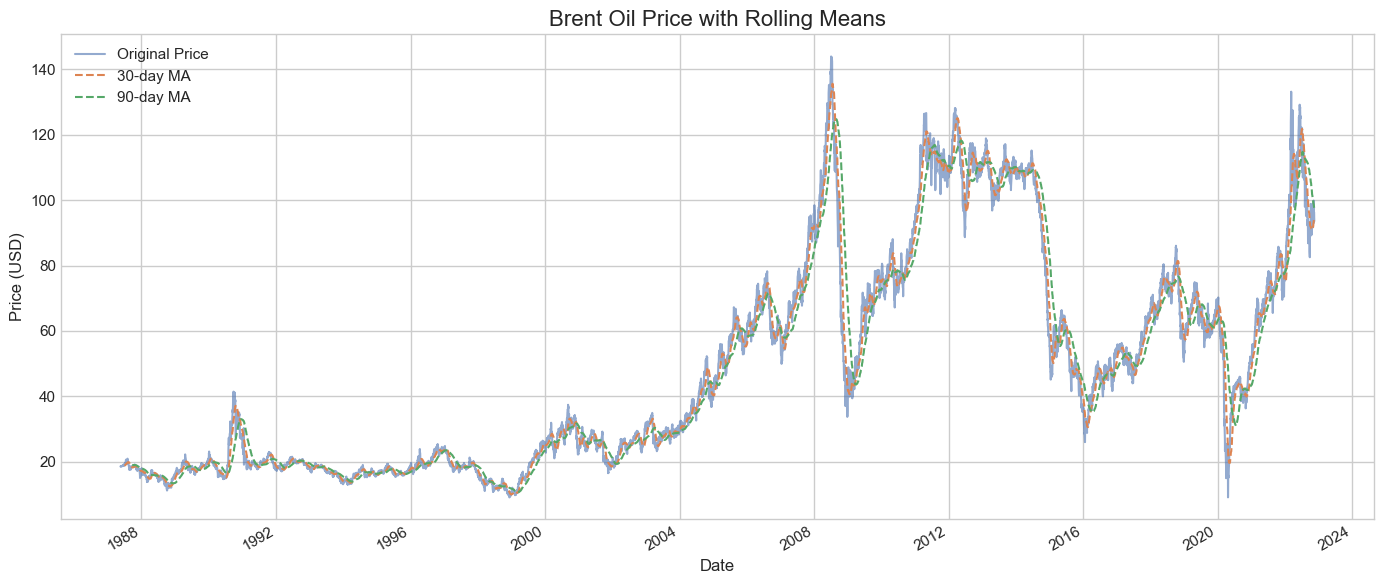

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\rolling_means.png


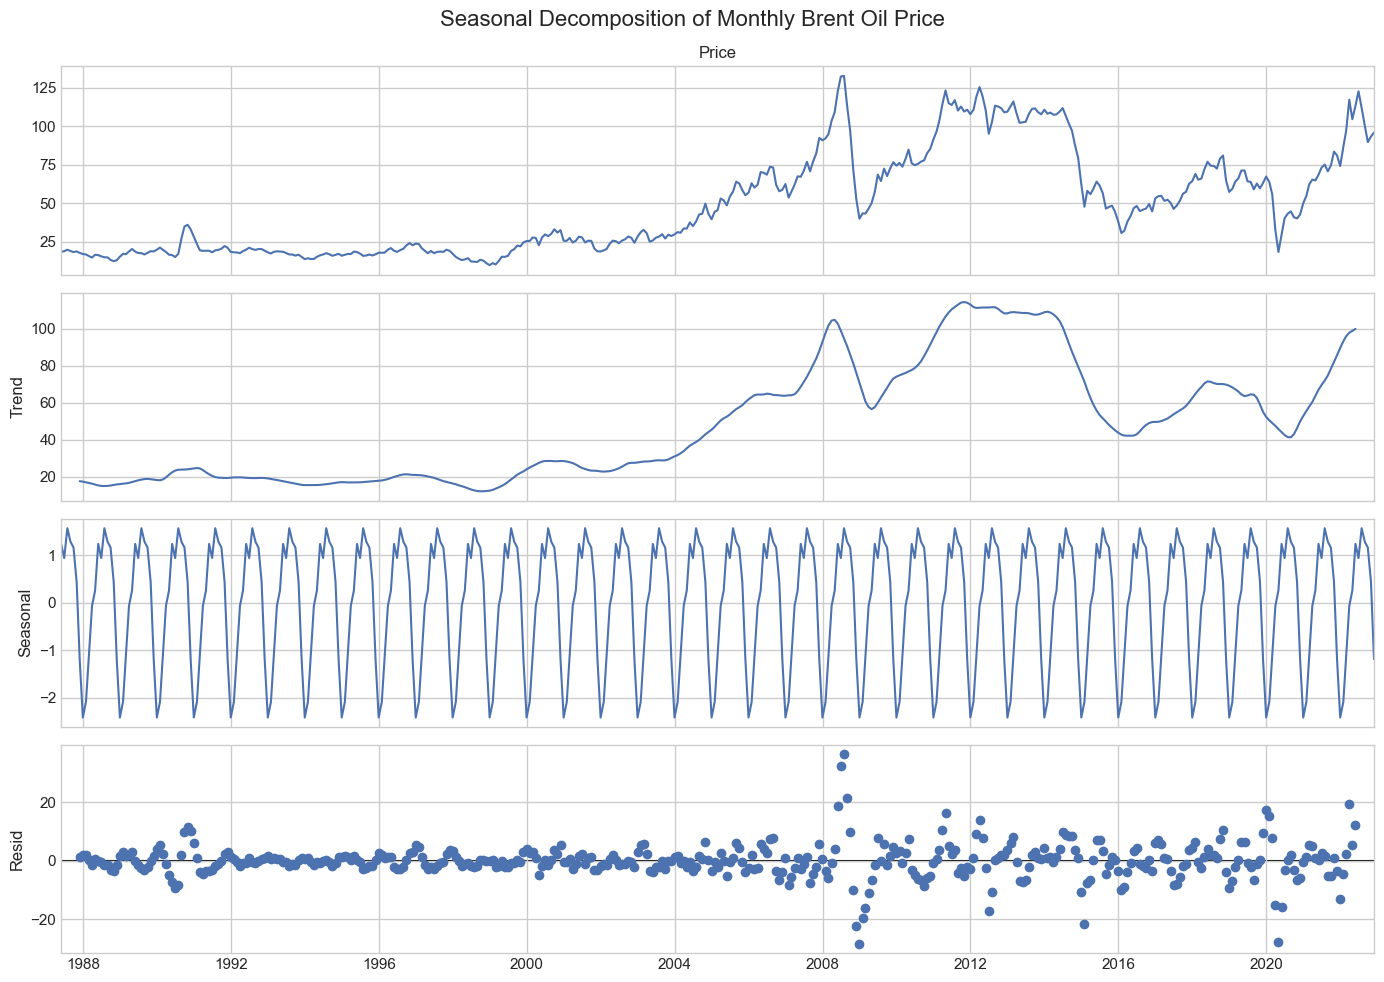

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\seasonal_decomposition.png


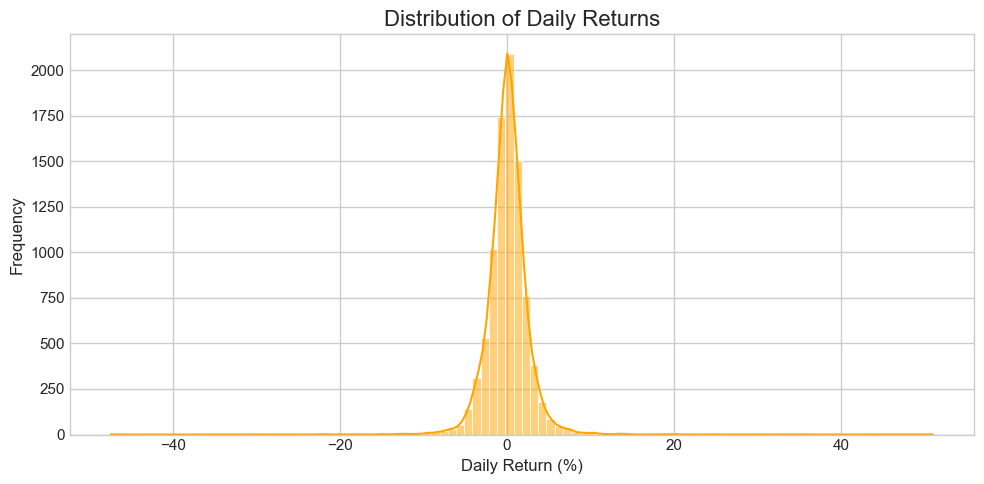

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\daily_return_distribution.png


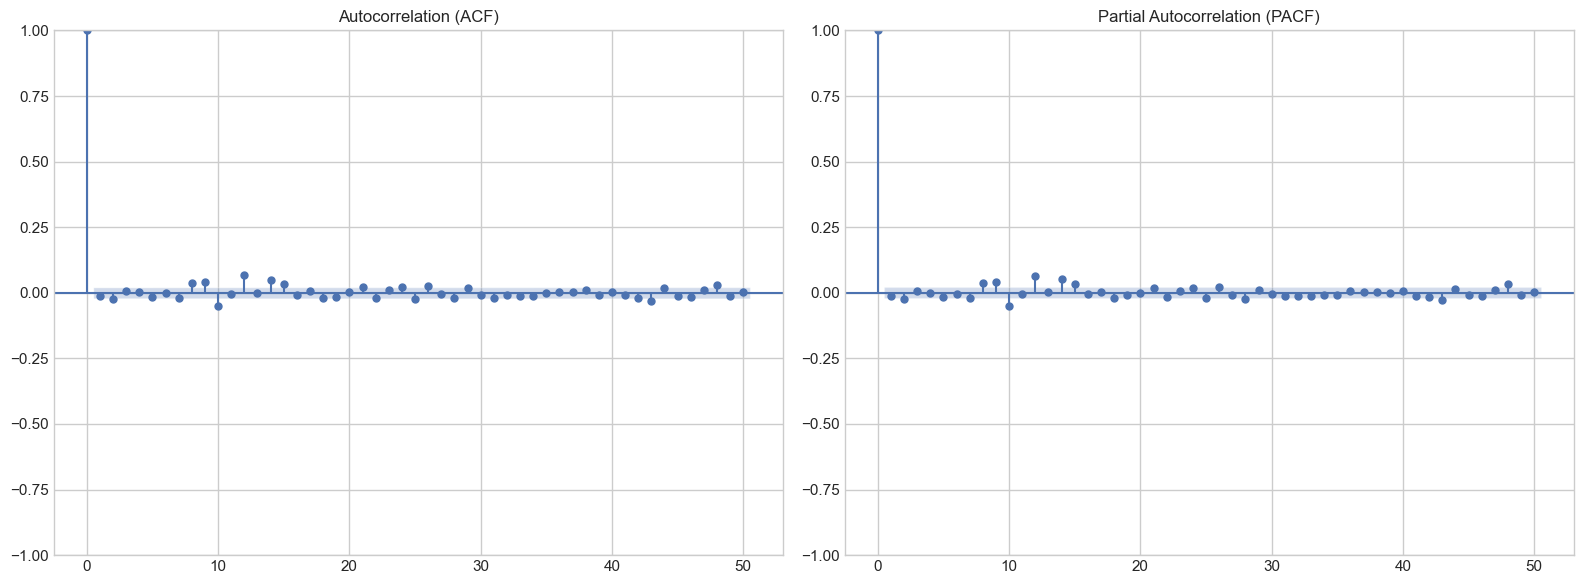

Plot saved to S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\acf_pacf.png
Compiling key event metadata...
Compiled 10 events.
Generating plot with events: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\price_with_events.png


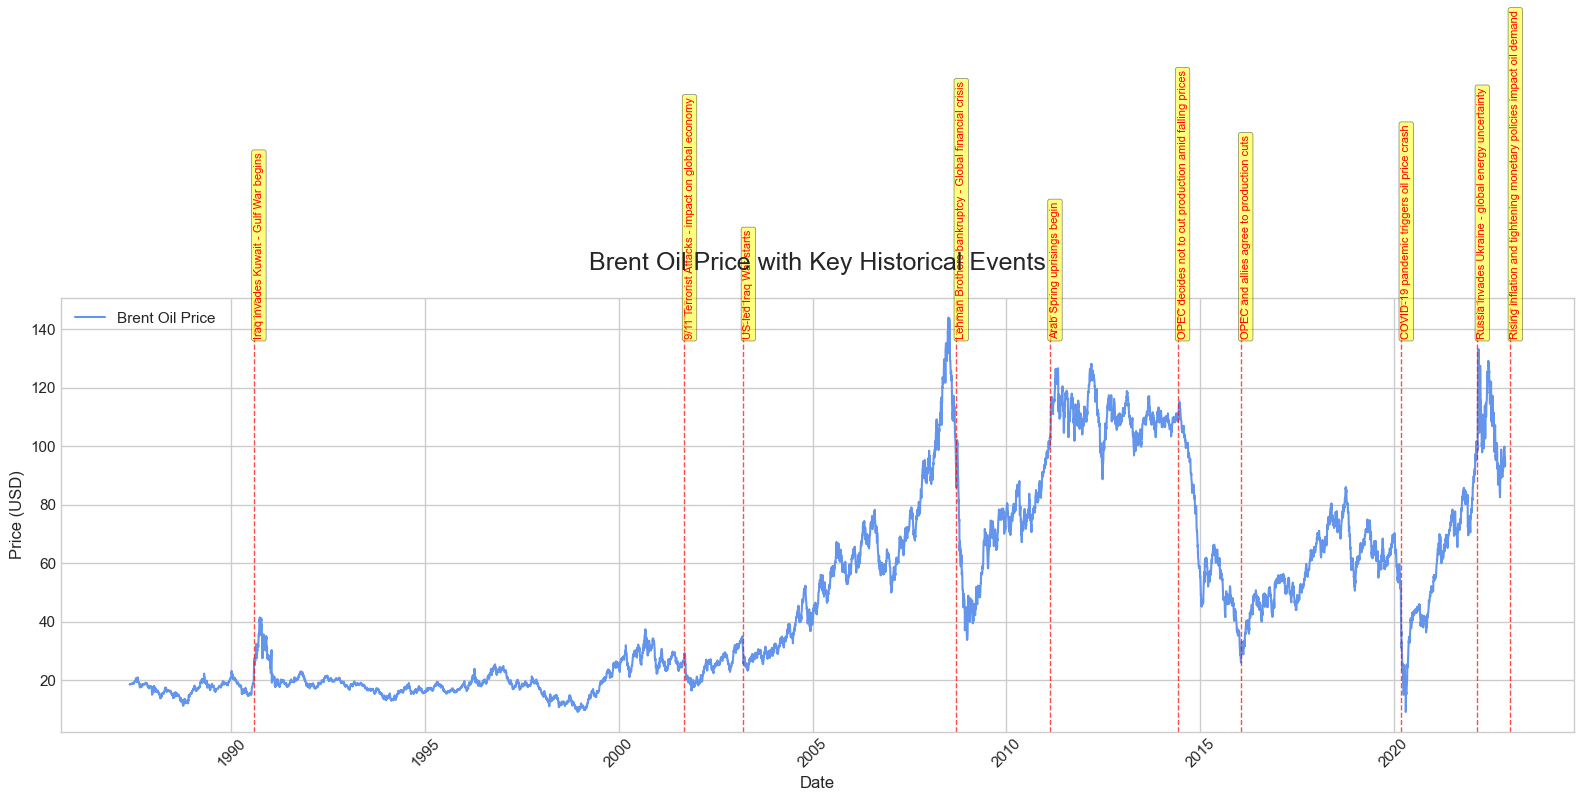

Plot saved successfully to: S:\AI MAstery\week-10\bayesian-change-point-analysis\reports\figures\price_with_events.png

--- Running Stationarity Tests ---
Augmented Dickey-Fuller (ADF) Test:
ADF Statistic: -1.9939, p-value: 0.2893

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
KPSS Statistic: 9.5588, p-value: 0.0100

=== Analysis Complete ===
All plots are saved in the 'S:\AI MAstery\week-10\bayesian-change-point-analysis\reports/figures' directory.


In [9]:
import sys
import os

# Find the project root by searching for the 'src' directory.
current_dir = os.getcwd()
while 'src' not in os.listdir(current_dir) and os.path.dirname(current_dir) != current_dir:
    current_dir = os.path.dirname(current_dir)

# Add the 'src' directory to the Python path
src_path = os.path.join(current_dir, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added {src_path} to Python path.")

# Now, import the module by its filename
import eda_and_change_detection_utils

# And call the main function
eda_and_change_detection_utils.main()

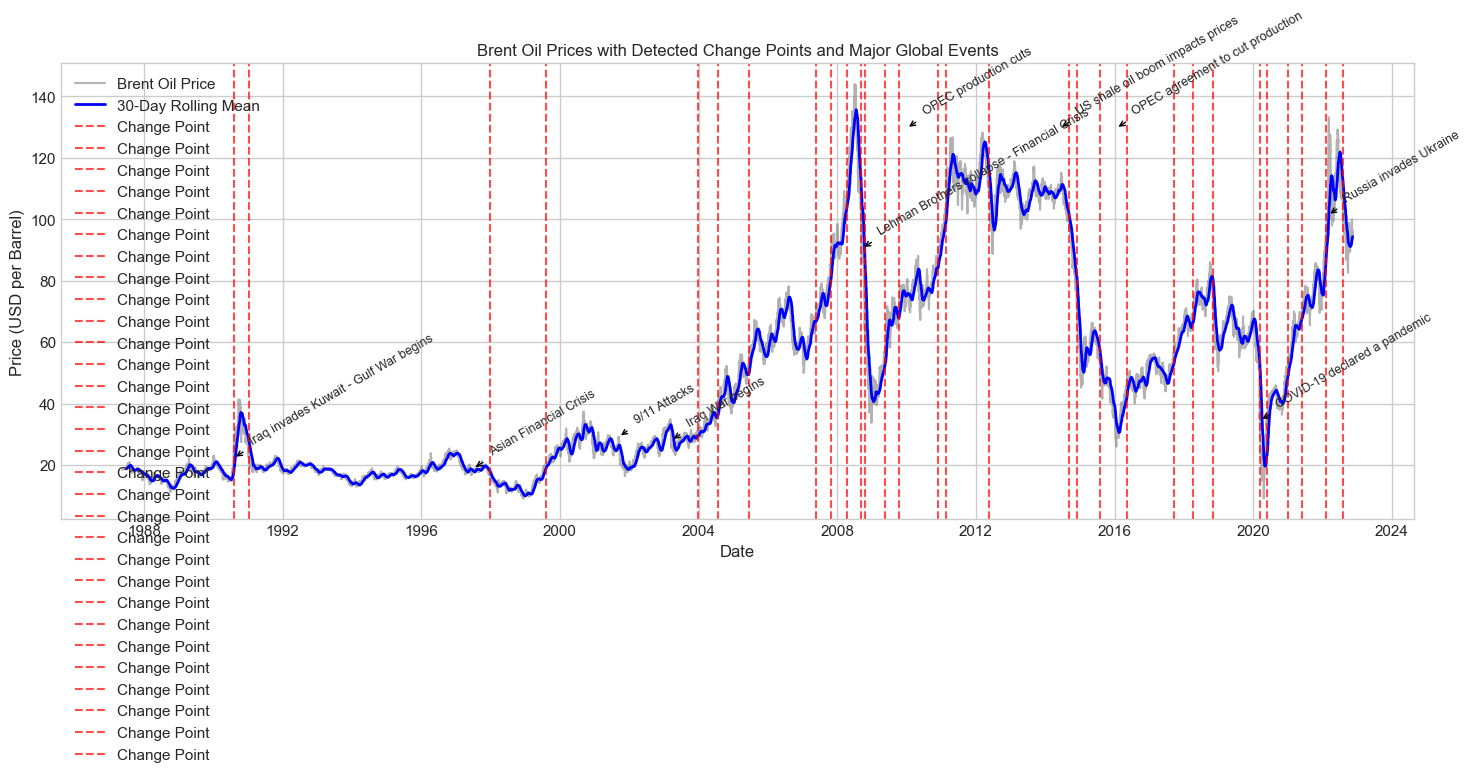

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import ruptures as rpt
# Assuming you have:
# df_price: DataFrame with 'Date' (datetime) and 'Price' columns
# df_events: DataFrame with 'Date' (datetime), 'Event_Type', 'Description'
# change_point_dates: list of pd.Timestamp for detected change points

# Replace 'your_brent_data.csv' with your actual data file path
df_price = pd.read_csv('../data/BrentOilPrices.csv')

# Convert Date column to datetime format
df_price['Date'] = pd.to_datetime(df_price['Date'])
event_data_path = '../data/event_data.csv'  # Adjust if needed

df_events = pd.read_csv(event_data_path, parse_dates=['Date'], dayfirst=False)

# Ensure price data is in NumPy format
price_series = df_price['Price'].values.reshape(-1, 1)
# Signal to analyze
signal = df_price['Price'].values

# Initialize and fit the change point model
algo = rpt.Pelt(model="rbf").fit(signal)

# Detect change points (you can adjust penalty value)
change_points = algo.predict(pen=10)

# Apply change point detection (Binseg + RBF model)
algo = rpt.Binseg(model="rbf").fit(price_series)
breakpoints = algo.predict(n_bkps=10)  # Choose 10 change points

# Extract date of each change point (ignore last point which is end of series)
change_dates = df_price['Date'].iloc[[bp - 1 for bp in breakpoints[:-1]]].reset_index(drop=True)
change_point_dates = df_price.iloc[change_points[:-1]]['Date'].tolist()
plt.figure(figsize=(15,7))

# Plot raw prices
plt.plot(df_price['Date'], df_price['Price'], label='Brent Oil Price', color='grey', alpha=0.6)

# Plot rolling mean (e.g., 30-day)
rolling_window = 30
plt.plot(df_price['Date'], df_price['Price'].rolling(window=rolling_window).mean(),
         label=f'{rolling_window}-Day Rolling Mean', color='blue', linewidth=2)

# Plot change points
for cp_date in change_point_dates:
    plt.axvline(x=cp_date, color='red', linestyle='--', alpha=0.7, label='Change Point')

# Annotate events (show a few to avoid clutter)
for idx, row in df_events.iterrows():
    plt.annotate(row['Description'],
                 xy=(row['Date'], df_price.loc[df_price['Date'] == row['Date'], 'Price'].values[0] if row['Date'] in df_price['Date'].values else df_price['Price'].max()*0.9),
                 xytext=(10, 10),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'),
                 fontsize=9,
                 rotation=30)

plt.title('Brent Oil Prices with Detected Change Points and Major Global Events')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

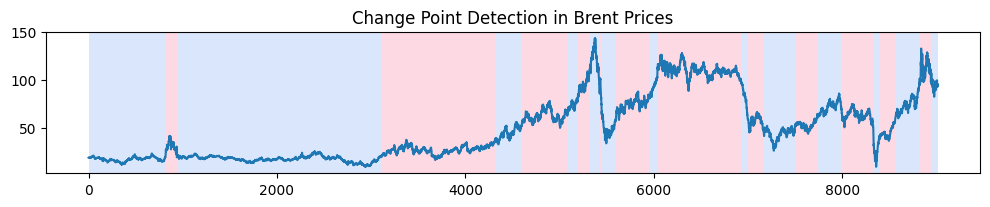

Detected change points at:
- 1990-08-06
- 1991-01-16
- 1999-09-07
- 2004-05-04
- 2005-06-16
- 2007-05-18
- 2007-10-24
- 2008-04-11
- 2008-09-03
- 2008-10-15
- 2009-05-29
- 2010-11-01
- 2011-02-10
- 2014-09-08
- 2014-12-02
- 2015-08-04
- 2016-11-30
- 2017-11-07
- 2018-11-15
- 2020-03-09
- 2020-05-29
- 2021-02-03
- 2022-02-04
- 2022-08-04


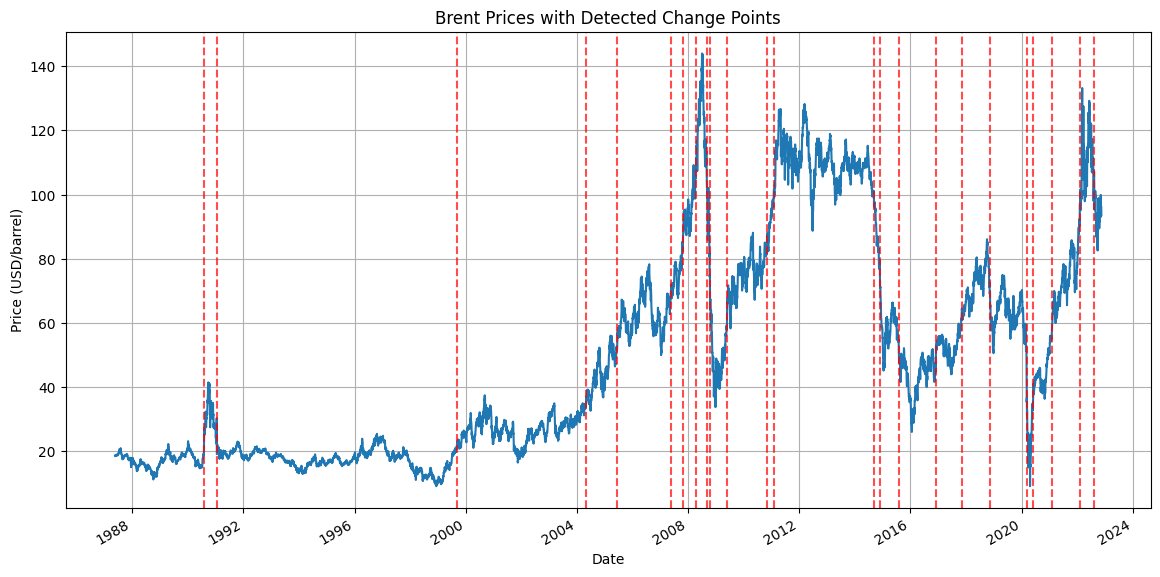

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
import os
# Load processed data
price_data = pd.read_csv('../data/processed/brent_clean.csv', parse_dates=['Date'], index_col='Date')

# Change point detection
def detect_changepoints(data, pen=10, model="rbf"):
    # Convert to numpy array
    signal = data.values.reshape(-1, 1)
    
    # Detect change points
    algo = rpt.Pelt(model=model).fit(signal)
    change_indices = algo.predict(pen=pen)
    
    # Convert indices to dates
    change_dates = data.index[change_indices[:-1]]
    
    # Plot results
    plt.figure(figsize=(14, 7))
    rpt.display(signal, change_indices)
    plt.title('Change Point Detection in Brent Prices')
    plt.savefig('../reports/figures/change_points.png')
    plt.show()
    
    return change_dates

# Run detection
change_points = detect_changepoints(price_data['Price'], pen=15)

# Print and save results
print("Detected change points at:")
for date in change_points:
    print(f"- {date.strftime('%Y-%m-%d')}")

pd.DataFrame({'change_date': change_points}).to_csv('../reports/change_points.csv', index=False)

# Visualize with price data
plt.figure(figsize=(14, 7))
price_data['Price'].plot()
for cp in change_points:
    plt.axvline(x=cp, color='red', linestyle='--', alpha=0.7)
plt.title('Brent Prices with Detected Change Points')
plt.ylabel('Price (USD/barrel)')
plt.grid(True)
plt.savefig('../reports/figures/price_with_change_points.png')
plt.show()